In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [4]:
x_val[10] ,

(array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.      

In [5]:
y_val[10]

5.0

In [11]:
# inputs = keras.Input(shape=(784,), name='digits')
# x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
# x = layers.Dense(64, activation='relu', name='dense_2')(x)
# outputs = layers.Dense(10, name='predictions')(x)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
#               # Loss function to minimize
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               # List of metrics to monitor
#               metrics=['sparse_categorical_accuracy'])

In [36]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = keras.models.Sequential([
    keras.layers.InputLayer(784,),
    Dense(128, activation='relu', name='dense_1'),
    Dropout(0.2),
    #Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              # List of metrics to monitor
              metrics=['sparse_categorical_accuracy'])

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=13,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/13
50000/50000 [==============================] - 5s 91us/sample - loss: -237259.1383 - sparse_categorical_accuracy: 0.0986 - val_loss: -863614.1342 - val_sparse_categorical_accuracy: 0.0991
Epoch 2/13
50000/50000 [==============================] - 5s 104us/sample - loss: -2933912.9689 - sparse_categorical_accuracy: 0.0986 - val_loss: -6010947.8176 - val_sparse_categorical_accuracy: 0.0991
Epoch 3/13
50000/50000 [==============================] - 5s 92us/sample - loss: -11912493.2352 - sparse_categorical_accuracy: 0.0986 - val_loss: -19334454.3264 - val_sparse_categorical_accuracy: 0.0991
Epoch 4/13
50000/50000 [==============================] - 5s 101us/sample - loss: -31171380.1088 - sparse_categorical_accuracy: 0.0986 - val_loss: -44788186.9568 - val_sparse_categorical_accuracy: 0.0991
Epoch 5/13
50000/50000 [==============================] - 5s 104us/sample - loss: -64495038.5357 - sparse_categorical_accuracy: 0.0986 - val_l

In [39]:
history.history

{'loss': [-237259.13834790397,
  -2933912.96888,
  -11912493.2352,
  -31171380.1088,
  -64495038.53568,
  -116088275.17952,
  -189673994.48576,
  -289256929.09568,
  -419070372.63872,
  -582033405.29664,
  -782794887.63904,
  -1027130174.34112,
  -1313586070.89664],
 'sparse_categorical_accuracy': [0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864,
  0.09864],
 'val_loss': [-863614.1342,
  -6010947.8176,
  -19334454.3264,
  -44788186.9568,
  -86254347.392,
  -147630257.3568,
  -232965687.1936,
  -345740315.4432,
  -490311696.9472,
  -670246174.72,
  -889563422.9248,
  -1152362801.152,
  -1461773008.4864],
 'val_sparse_categorical_accuracy': [0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991,
  0.0991]}

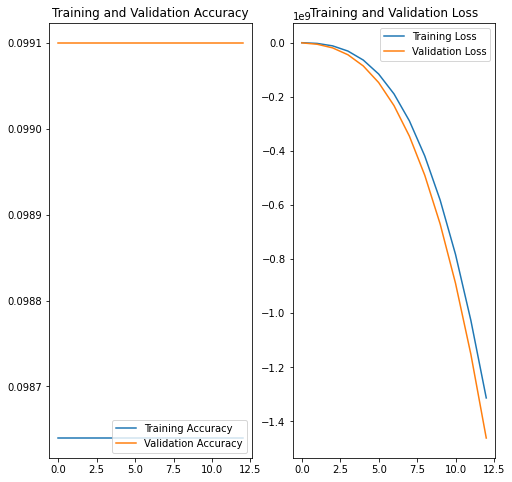

In [40]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(13)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
tf.keras.models.save_model(model,"/tmp/mobilenet/7/5")


INFO:tensorflow:Assets written to: /tmp/mobilenet/7/5/assets


In [11]:
import json
import numpy
import requests

re_da = x_val[11]
re_da = np.resize(re_da, [1, re_da.size])


data = json.dumps({"signature_name": "serving_default",
                   "instances":re_da.tolist()})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mobilenet1:predict',
                              data=data, headers=headers)
print(json_response.text)
predictions = numpy.array(json.loads(json_response.text)["predictions"])
predictions[0]

{ "error": "input must be 4-dimensional[1,784]\n\t [[{{node sequential_2/conv2d_7/BiasAdd}}]]" }


KeyError: 'predictions'

In [41]:
dd = np.argmax([predictions[0]])
print(dd)
y_val[dd]

NameError: name 'predictions' is not defined

In [44]:
re_da = x_val[11]
re_da = np.resize(re_da, [1, re_da.size])
re_da




array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23137255, 0.9372549 , 0.30588236,
        0.        , 0.        , 0.        , 0.  

In [52]:
a = ["d","c","f",7]
b = ["c","a","c"]
c = set(a) - set(b)
for i in c:
    print(i)

f
d
7
